# Iris Dataset: Foundational Data Analysis 


**Introduction**

The Iris dataset was used in R.A. Fisher's classic 1936 paper,The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm 

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

**Import modules and datasets**

In [108]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import itertools


from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from utils import extract_plot_ranges, generate_grid_points

%config InlineBackend.figure_format = "retina"

# set seaborn aesthetics
sns.set_context("notebook")
sns.set_style("white")

# set colormap
CMAP = "tab10"

# set random seed
seed = 10
np.random.seed(seed)


In [109]:
#import data set
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [110]:
iris_df = pd.DataFrame(iris)
print(" Shape of the dataframe: ",iris_df.shape,";\n","Describe dataframe: \n",iris_df.info)

 Shape of the dataframe:  (150, 5) ;
 Describe dataframe: 
 <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


**Data cleaning**

check for null values and duplicates in the dataset

In [111]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [112]:
iris_df.duplicated().sum()

np.int64(1)

In [113]:
iris_df[iris_df.duplicated()]

sepal_length  sepal_width  petal_length  petal_width    species
142           5.8          2.7           5.1          1.9  virginica

In [114]:
iris_df = iris_df.drop_duplicates()

In [115]:
iris_df.duplicated().sum()

np.int64(0)

In [116]:
iris_df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.843624     3.059732      3.748993     1.194631
std        0.830851     0.436342      1.767791     0.762622
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

**EDA**

explore the dataset, find patterns and correlations in the dataset

single factor analysis

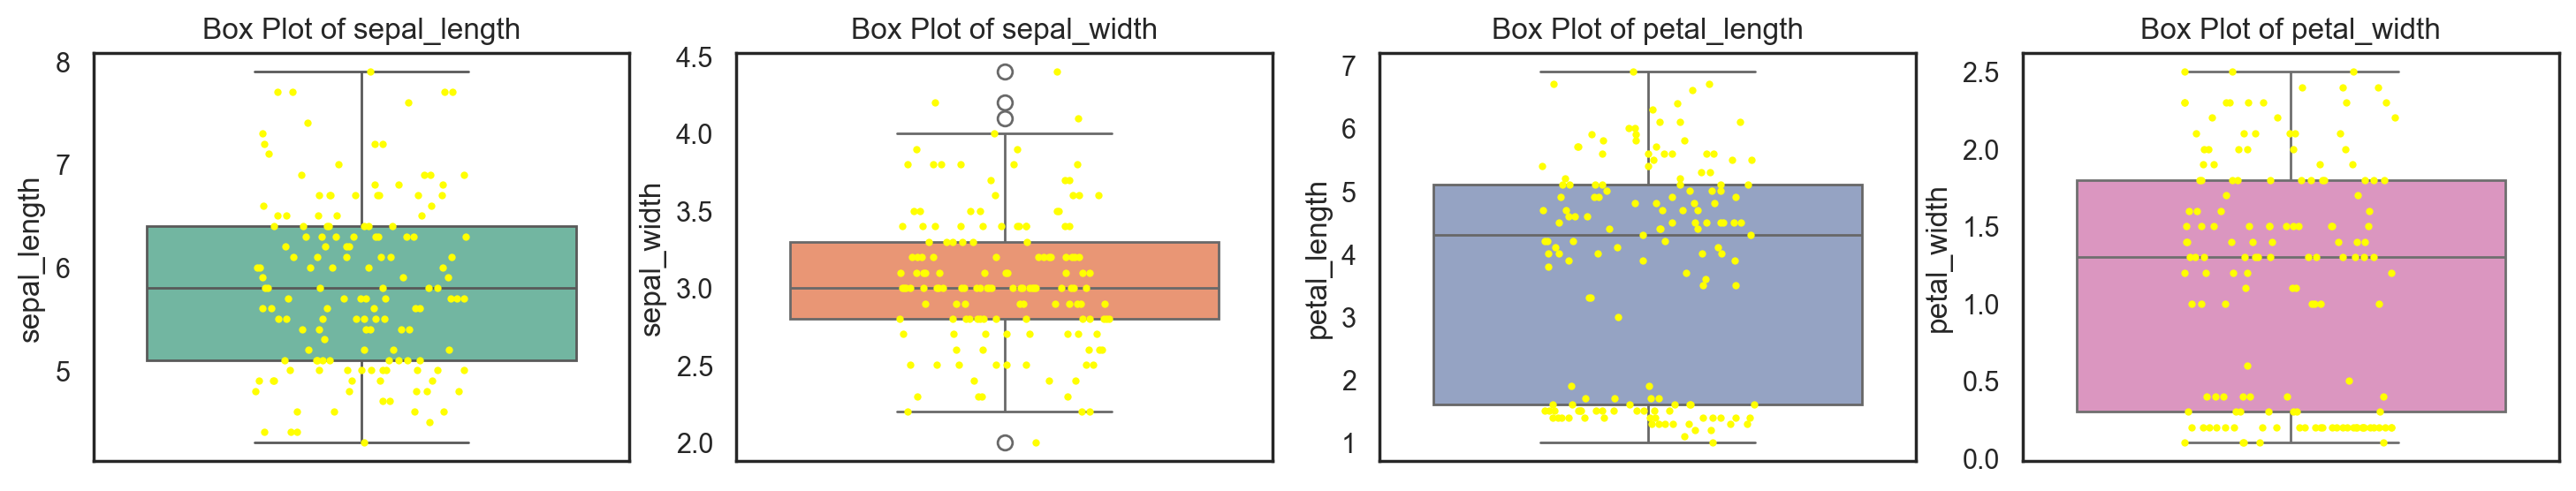

In [117]:
#single factor analysis
numeric_features = iris_df.select_dtypes(include=['float64', 'int64']).columns
fig = plt.figure(figsize=(18,3))
colors = sns.color_palette("Set2", len(numeric_features))

for idx, feature in enumerate(numeric_features, start=1):
    ax = fig.add_subplot(1, 4, idx)  # 2 rows, 3 cols, current index
    sns.boxplot(y=iris_df[feature], ax=ax,color=colors[idx - 1])
    sns.stripplot( y=iris_df[feature], color="yellow", jitter=0.2, size=3)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_ylabel(feature)

we can see that in the boxplot of spetal_width there are several outliners 

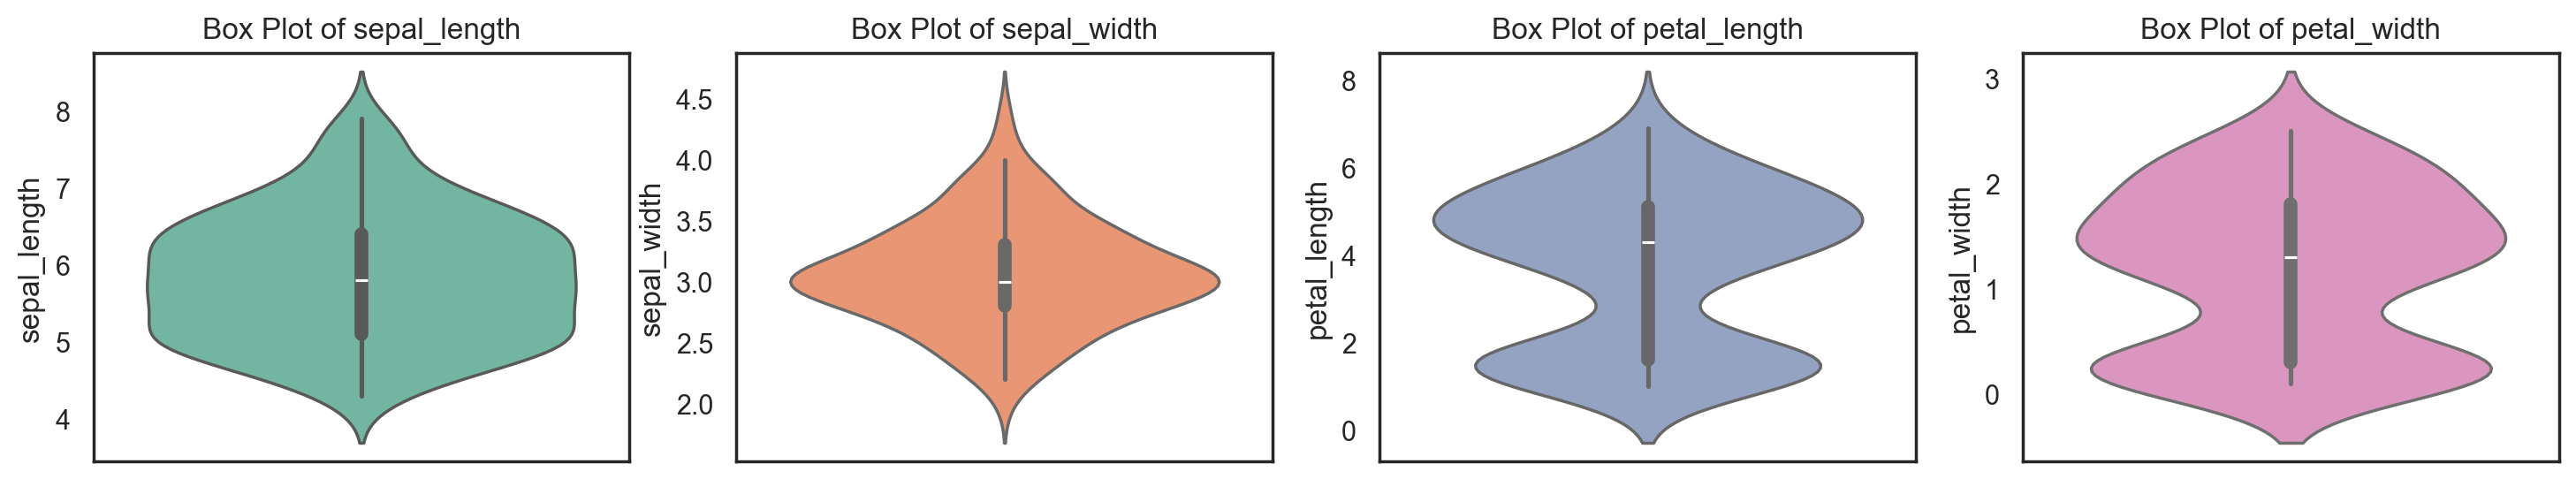

In [118]:
#single factor analysis
numeric_features = iris_df.select_dtypes(include=['float64', 'int64']).columns
fig = plt.figure(figsize=(18,3))
colors = sns.color_palette("Set2", len(numeric_features))

for idx, feature in enumerate(numeric_features, start=1):
    ax = fig.add_subplot(1, 4, idx)  # 2 rows, 3 cols, current index
    sns.violinplot(y=iris_df[feature], ax=ax,color=colors[idx - 1])
    ax.set_title(f'Box Plot of {feature}')
    ax.set_ylabel(feature)

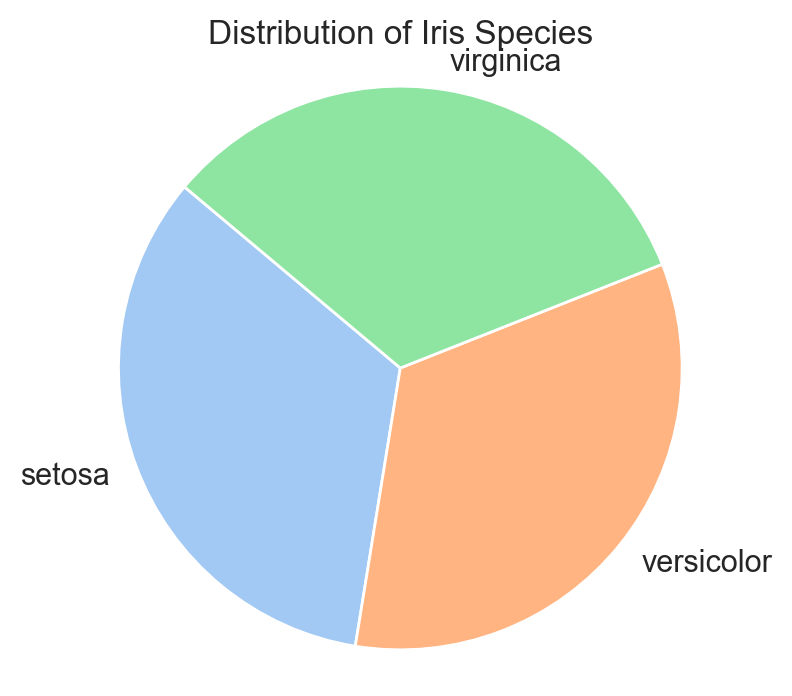

In [119]:
#display the distribution of the speices

species_counts = iris_df['species'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    species_counts,
    labels=species_counts.index,
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Distribution of Iris Species')
plt.axis('equal')  
plt.show()

multi factor

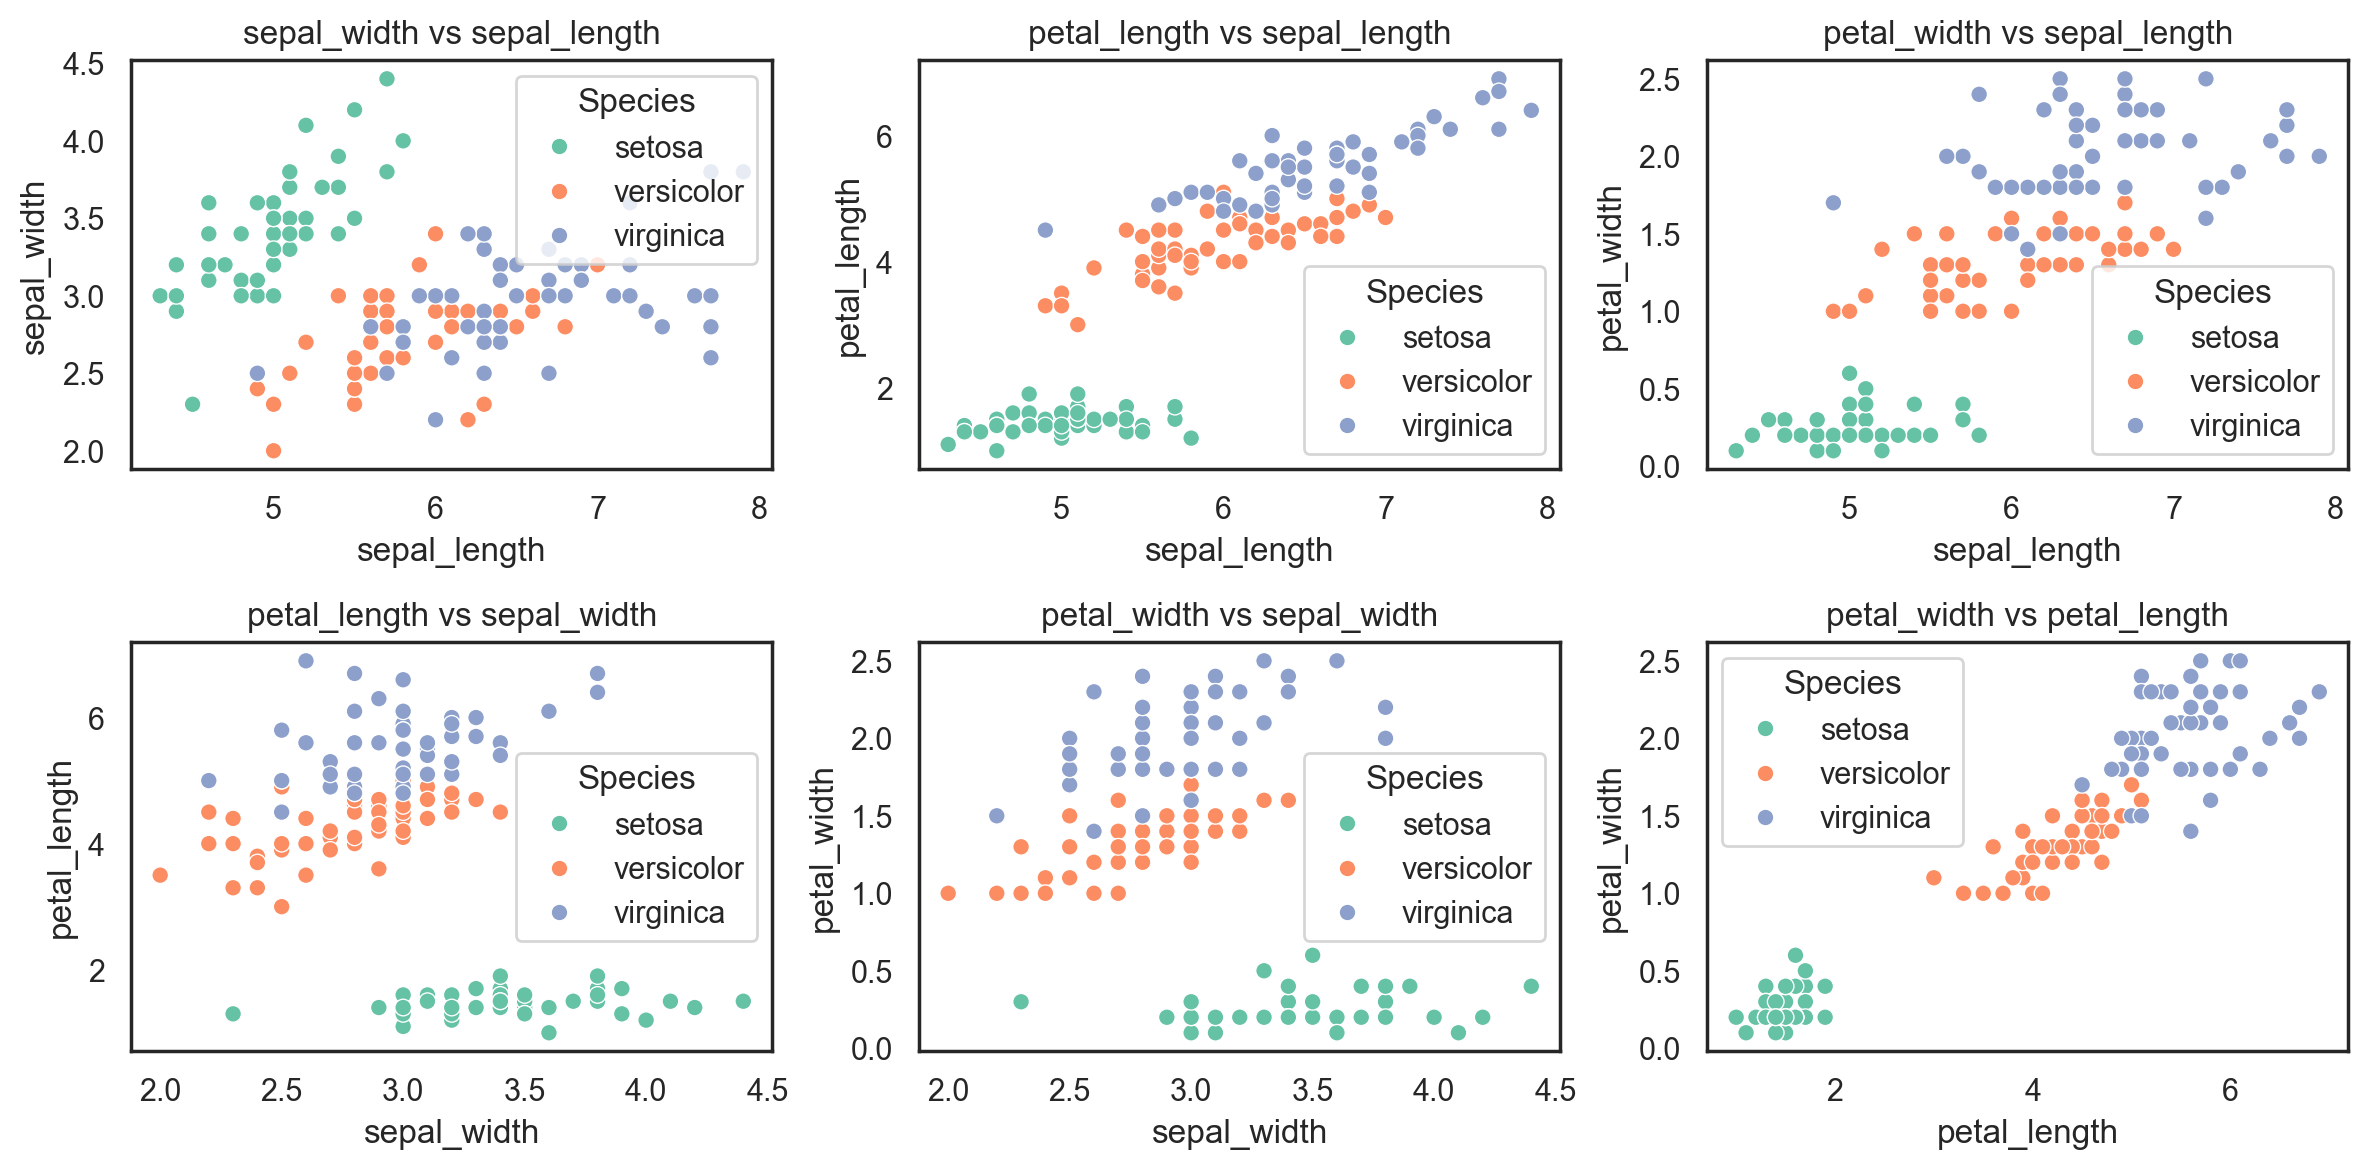

In [120]:
#correlation visualzation
iris_df = iris_df.drop_duplicates()

# Feature pairs to plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pairs = list(itertools.combinations(features, 2))  # all unique 2-feature combinations

# Set up 3x2 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

# Create each subplot
for i, (x_feat, y_feat) in enumerate(pairs):
    sns.scatterplot(data=iris, x=x_feat, y=y_feat, hue='species', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{y_feat} vs {x_feat}')
    axes[i].legend().set_title('Species')

# Remove unused subplot if any
if len(axes) > len(pairs):
    for j in range(len(pairs), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# Modeling

to choose the correct model used for a classification problem for iris dataset, considering iris is a small sized, three class dataset, there's the model to choose from: 

Logic regression 

KNN 

decision tree

random forest

SVM


and for efficiency and noise reduction, feature engineering,  we're applying a PCA to reduce the factors to two

In [121]:
# Load iris
iris = load_iris()
X = iris.data
y = iris.target

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Accuracy: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



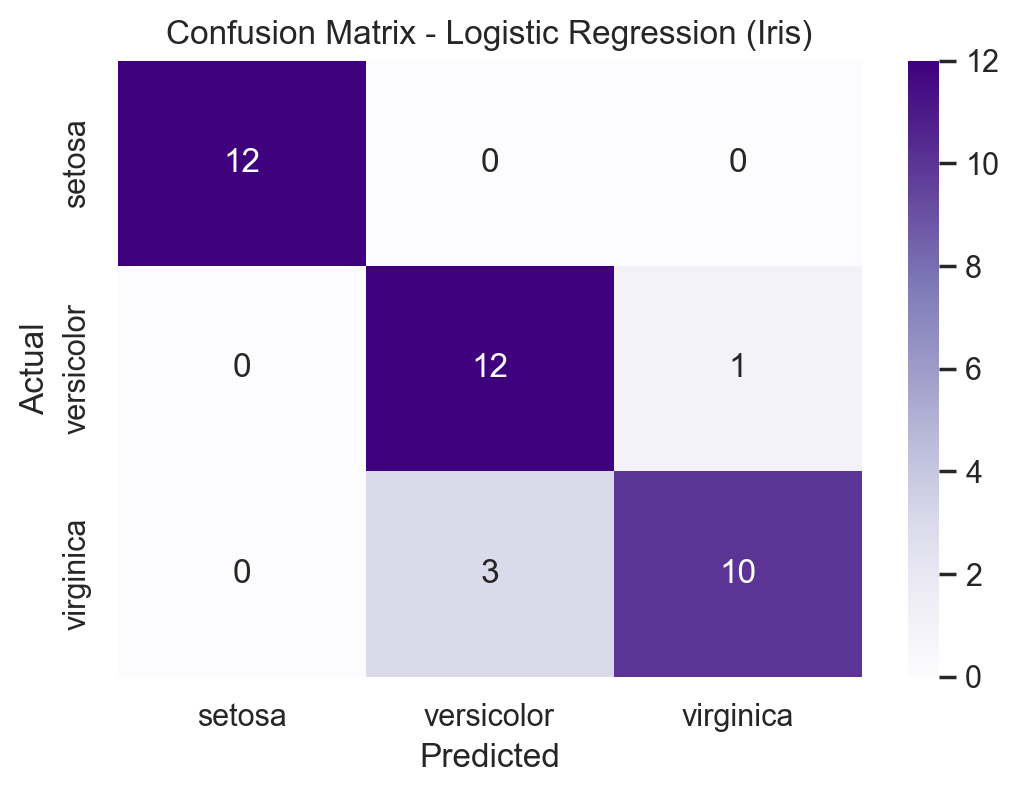

In [129]:
#logic regression
#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=42, stratify=y
)
#model
LoR = LogisticRegression(
    # multi_class="multinomial", #use multinomial because target has 3 classes
    solver="lbfgs",             
    max_iter=200               
)

LoR.fit(X_train, y_train)
y_pred = LoR.predict(X_test)

#result
lor_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lor_Accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Iris)")
plt.show()

k=1, accuracy=0.947
k=2, accuracy=0.921
k=3, accuracy=0.974
k=4, accuracy=0.974
k=5, accuracy=0.947
k=6, accuracy=0.921
k=7, accuracy=0.921
k=8, accuracy=0.895
k=9, accuracy=0.921
k=10, accuracy=0.921

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

Accuracy: 0.9473684210526315


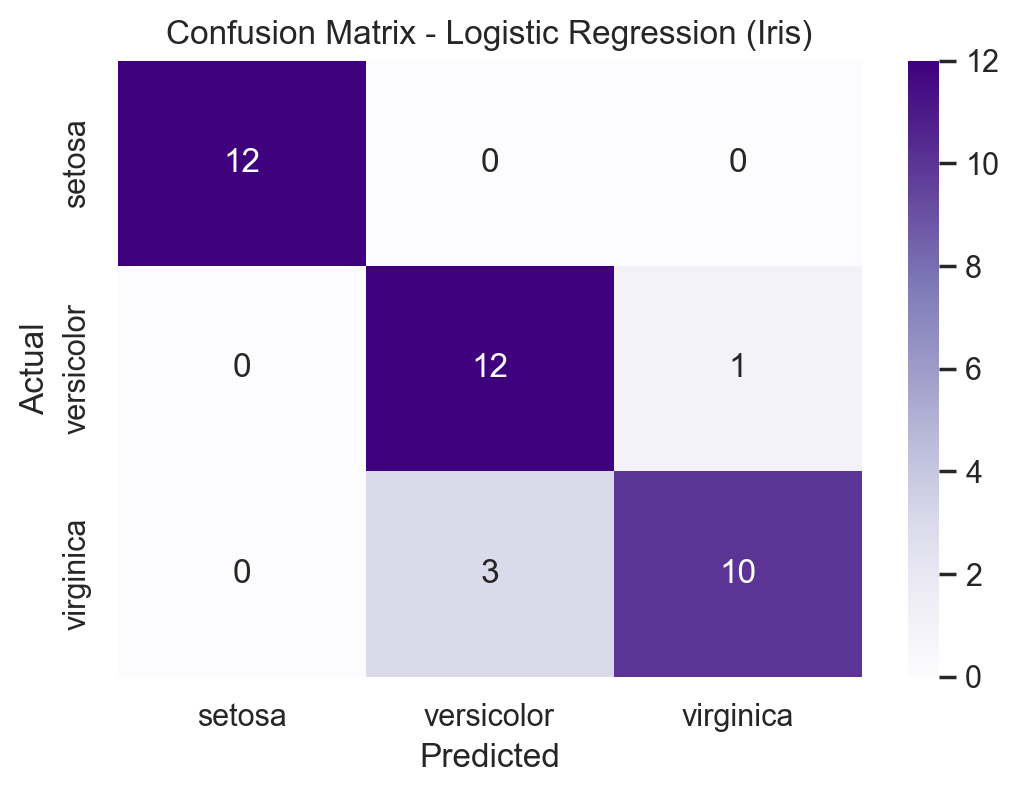

In [128]:
#KNN
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"k={k}, accuracy={score:.3f}")
# model (with k=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)
knn_Accuracy = accuracy_score(y_test, y_pred)


#Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Accuracy:", knn_Accuracy)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Iris)")
plt.show()


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

Accuracy: 0.9473684210526315


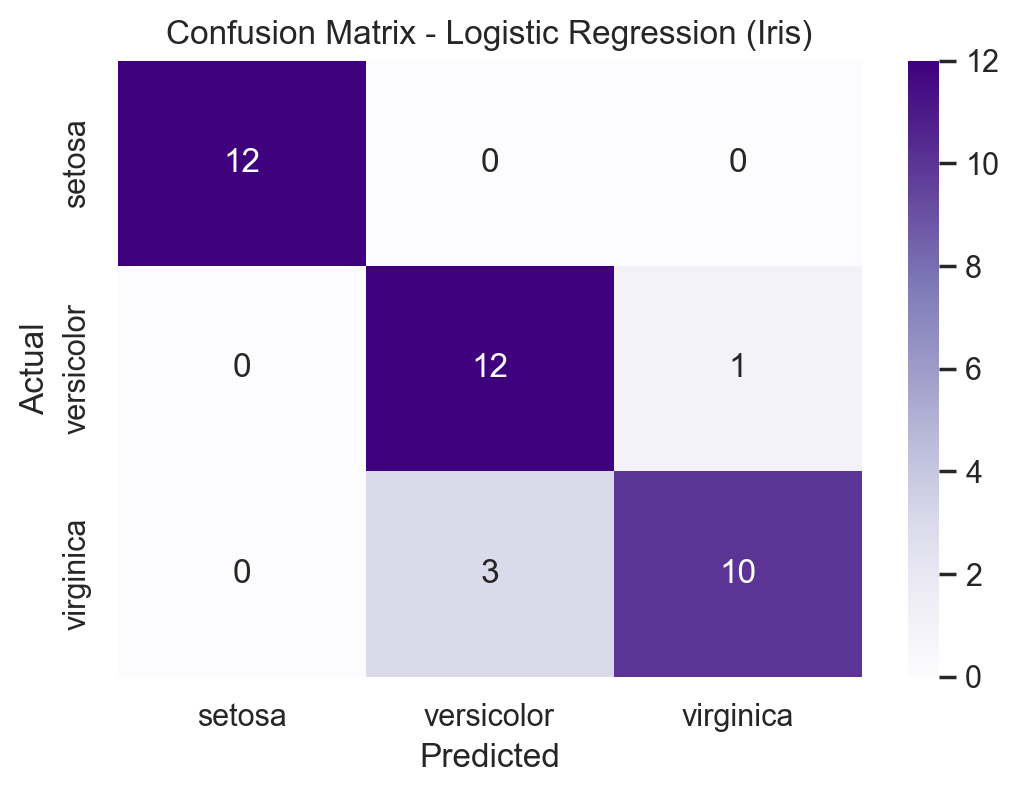

In [127]:


# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM (RBF kernel)
svm = SVC(kernel="rbf", gamma="auto", C=1.0)
svm.fit(X_train, y_train)
test_acc = svm.score(X_test, y_test)


svm_Accuracy = accuracy_score(y_test, y_pred)

#Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Accuracy:", svm_Accuracy)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Iris)")
plt.show()

Grid points: (10000, 2)


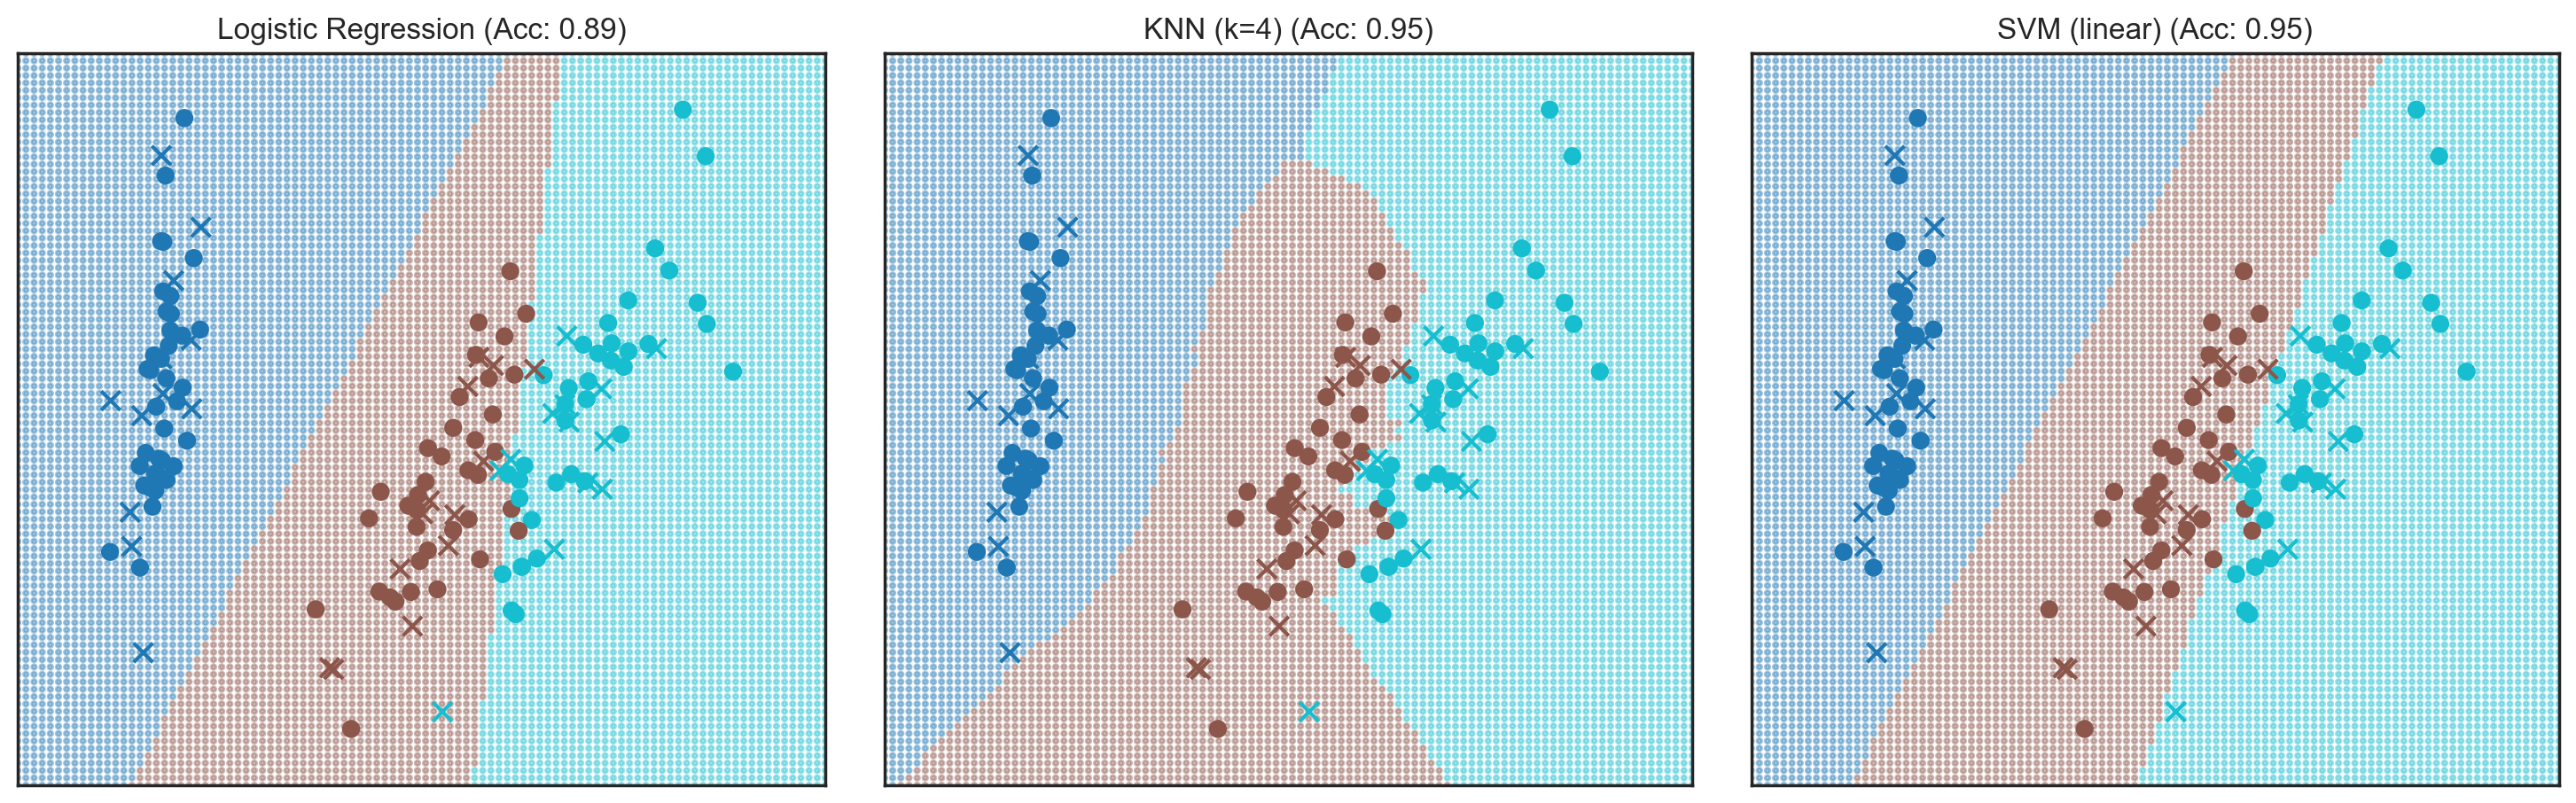

In [125]:
# 4. build grid of shape 100 x 100 = 10k
min_x1, max_x1, min_x2, max_x2 = extract_plot_ranges(X_train)
grid_points = generate_grid_points(min_x1, max_x1, min_x2, max_x2)
print("Grid points: {}".format(grid_points.shape))


models = {
    "Logistic Regression": LoR,
    "KNN (k=4)": knn,
    "SVM (linear)": SVC(kernel="linear", probability=True),
    #"SVM (RBF)": SVC(kernel="rbf", gamma=0.5, probability=True)
}

fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    # Fit model
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    # Predict background (decision boundary)
    background_predictions = model.predict(grid_points)

    # Plot decision regions
    ax.scatter(grid_points[:, 0], grid_points[:, 1],
               c=background_predictions, cmap=CMAP, alpha=0.4, s=4)

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=CMAP)

    # Plot test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x", s=60, cmap=CMAP)

    # Title: Model name + accuracy
    ax.set_title(f"{name} (Acc: {test_accuracy:.2f})")

    # Hide axis ticks
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_xlim([min_x1, max_x1])
    ax.set_ylim([min_x2, max_x2])

plt.tight_layout(pad=2.0)
plt.show()